In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('dataset/Resume/Resume.csv')
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [8]:
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [11]:
df.drop(columns = 'Resume_html', inplace = True)
df

ID                                         Resume_str  Category
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...        HR
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...        HR
2     33176873           HR DIRECTOR       Summary      Over 2...        HR
3     27018550           HR SPECIALIST       Summary    Dedica...        HR
4     17812897           HR MANAGER         Skill Highlights  ...        HR
...        ...                                                ...       ...
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...  AVIATION
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...  AVIATION
2481  31605080           GEEK SQUAD AGENT         Professional...  AVIATION
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...  AVIATION
2483  37473139           STOREKEEPER II       Professional Sum...  AVIATION

[2484 rows x 3 columns]

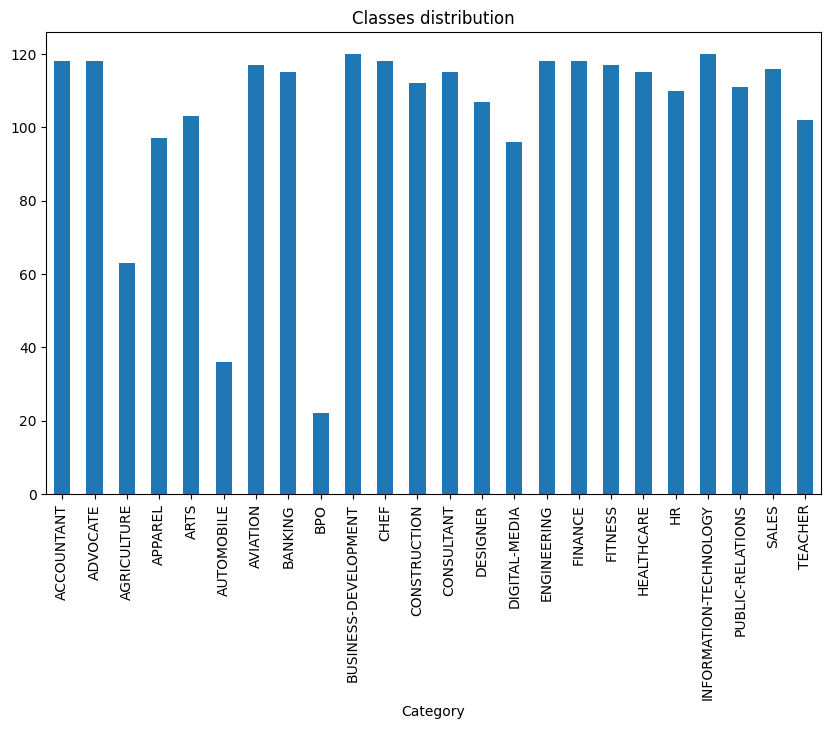

In [12]:
df['Category'].value_counts().sort_index().plot(kind='bar', title='Classes distribution', figsize=(10,6))
plt.show()

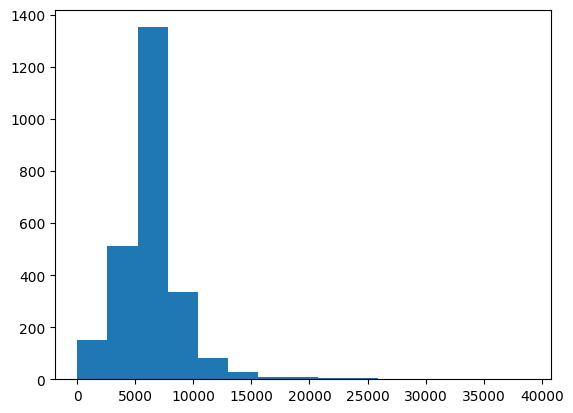

In [17]:
plt.hist([len(x) for x in df.Resume_str], bins = 15)
plt.show()

**Text Vectorization**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import nltk 

In [28]:
nltk.download('stopwords')
nltk.download('words')

stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
count_vect = CountVectorizer(stop_words = list(stopwords))
Resume_vector = count_vect.fit_transform(df.Resume_str)
Resume_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 828737 stored elements and shape (2484, 40390)>

In [34]:
vocabulary = count_vect.vocabulary_ # it is a mapping of terms to feature indices.
vocabulary

{'hr': 18145,
 'administrator': 2771,
 'marketing': 22845,
 'associate': 4587,
 'summary': 35271,
 'dedicated': 11094,
 'customer': 10583,
 'service': 32934,
 'manager': 22636,
 '15': 373,
 'years': 40177,
 'experience': 14419,
 'hospitality': 18066,
 'management': 22616,
 'respected': 31089,
 'builder': 6795,
 'leader': 21404,
 'focused': 15486,
 'teams': 36009,
 'strives': 34997,
 'instill': 19357,
 'shared': 33096,
 'enthusiastic': 13693,
 'commitment': 9016,
 'highlights': 17768,
 'satisfaction': 32237,
 'team': 36000,
 'savvy': 32284,
 'conflict': 9415,
 'resolution': 31064,
 'techniques': 36044,
 'training': 37022,
 'development': 11589,
 'skilled': 33600,
 'multi': 24503,
 'tasker': 35912,
 'client': 8526,
 'relations': 30656,
 'specialist': 34195,
 'accomplishments': 2411,
 'missouri': 23919,
 'dot': 12409,
 'supervisor': 35372,
 'certification': 7814,
 'certified': 7818,
 'ihg': 18591,
 'loyalty': 22169,
 'segment': 32740,
 'hilton': 17801,
 'worldwide': 39916,
 'general': 163

In [35]:
print(f'The vocabulary contains {len(vocabulary)} terms in total')

The vocabulary contains 40390 terms in total


In [36]:
tokens = count_vect.get_feature_names_out()

In [40]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(Resume_vector)

X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 828737 stored elements and shape (2484, 40390)>